# Chapter 5: Support Vector Machines

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import seaborn as sns
from pathlib import Path

In [10]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Soft Margin Classification

In [15]:
iris = load_iris(as_frame=True)
features = ['petal length (cm)', 'petal width (cm)']
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = (iris.target == 2)

svm_clf = make_pipeline(
	StandardScaler(), 
	LinearSVC(C=1, random_state=42))

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [16]:
X_new = pd.DataFrame([[5.5, 1.7], [5.0, 1.5]], columns=features)
svm_clf.predict(X_new)

array([ True, False])

In [17]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

# Non Linear SVM Classification

In [29]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

svm_clf_poly = make_pipeline(
	PolynomialFeatures(degree=3),
	StandardScaler(),
	LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
	)


svm_clf_poly.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

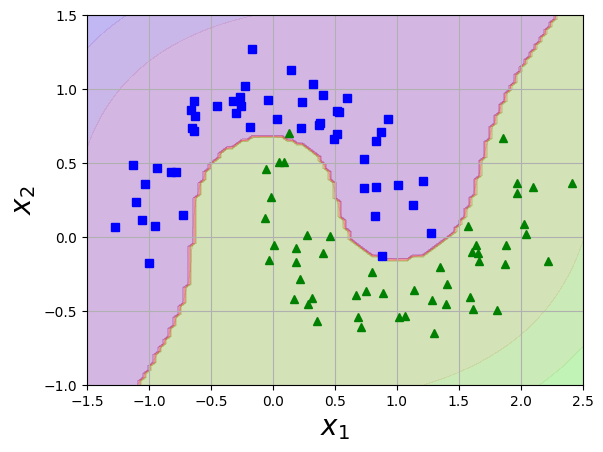

In [51]:
def plot_dataset(X, y, axes):
	plt.plot(X[y==0, 0], X[y==0, 1], "bs")
	plt.plot(X[y==1, 0], X[y==1, 1], "g^")
	plt.axis(axes)
	plt.grid(True, which='both')
	plt.xlabel(r"$x_1$", fontsize=20)
	plt.ylabel(r"$x_2$", fontsize=20)

def plot_contours(clf, axes):
	x0s = np.linspace(axes[0], axes[1], 100)
	x1s = np.linspace(axes[2], axes[3], 100)
	x0, x1 = np.meshgrid(x0s, x1s)
	X = np.c_[x0.ravel(), x1.ravel()]
	y_pred = clf.predict(X).reshape(x0.shape)
	y_decision = clf.decision_function(X).reshape(x0.shape)
	plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
	plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_contours(svm_clf_poly, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Polynomial Kernel

In [50]:
from sklearn.svm import SVC

svm_poly_kernel_clf = make_pipeline(
	StandardScaler(),
	SVC(kernel='poly', degree=3, coef0=1, C=5)
	)

svm_poly_kernel_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

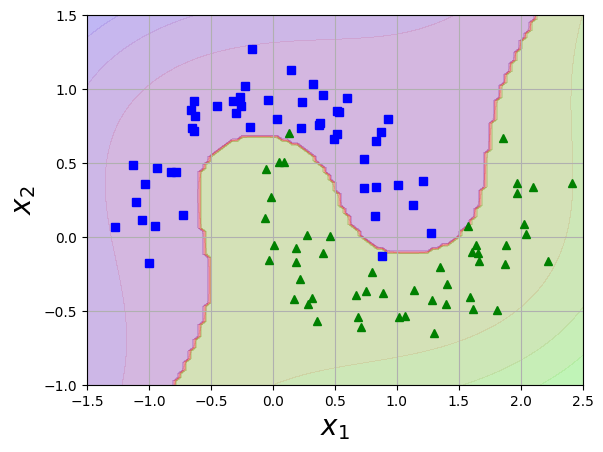

In [53]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_contours(svm_poly_kernel_clf, [-1.5, 2.5, -1, 1.5])